<a href="https://colab.research.google.com/github/Mystique1337/Developers-Foundary-Fellowship/blob/main/Copy_of_image_classifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset

In [ ]:


transform = transforms.Compose(

    [transforms.ToTensor(),
     transforms.Resize((224,224)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset_full = torchvision.datasets.Food101(root='./data', split='train',
                                        download=True, transform=transform)
trainset = Subset(trainset_full, range(2000))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset_full = torchvision.datasets.Food101(root='./data', split='test',
                                       download=True, transform=transform)
testset = Subset(testset_full, range(2000))
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

#classes = ('plane', 'car', 'bird', 'cat',
        #   'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
classes= trainset_full.classes
print(classes)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

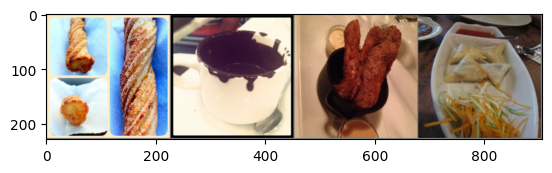

churros churros churros samosa


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:

import torch.nn as nn
import torch.nn.functional as F
"""
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
"""

'\nclass Net(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.conv1 = nn.Conv2d(3, 6, 5)\n        self.pool = nn.MaxPool2d(2, 2)\n        self.conv2 = nn.Conv2d(6, 16, 5)\n        self.fc1 = nn.Linear(16 * 5 * 5, 120)\n        self.fc2 = nn.Linear(120, 84)\n        self.fc3 = nn.Linear(84, 10)\n\n    def forward(self, x):\n        x = self.pool(F.relu(self.conv1(x)))\n        x = self.pool(F.relu(self.conv2(x)))\n        x = torch.flatten(x, 1) # flatten all dimensions except batch\n        x = F.relu(self.fc1(x))\n        x = F.relu(self.fc2(x))\n        x = self.fc3(x)\n        return x\n\n\nnet = Net()\n'

In [ ]:

#IMPROVED MODEL
class Net(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(3, 6, 5)
    self.bn1 = nn.BatchNorm2d(6)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.bn2 = nn.BatchNorm2d(16)
    #self.conv3 = nn.Conv2d(12,16 , 5)
    #self.bn3 = nn.BatchNorm2d(16)
    self.fc1 = nn.Linear(16 * 5 * 5, 1024)
    self.dropout1 = nn.Dropout(0.5)
    self.fc2 = nn.Linear(1024, 512)
    self.dropout2 = nn.Dropout(0.3)
    self.fc3 = nn.Linear(512, 256)
    self.dropout3 = nn.Dropout(0.1)
    self.fc4= nn.Linear(256, 10)

  def forward(self, x):

    x = self.pool(F.relu(self.bn1(self.conv1(x))))
    x = self.pool(F.relu(self.bn2(self.conv2(x))))
    #x = self.pool(F.relu(self.bn3(self.conv3(x))))
    x = torch.flatten(x, 1)
    x = self.dropout1(F.relu(self.fc1(x)))
    x = self.dropout2(F.relu(self.fc2(x)))
    x= self.dropout3(F.relu(self.fc3(x)))
    x = self.fc4(x)

    return x

net = Net()

In [ ]:
class ImprovedNet(nn.Module):
    def __init__(self, num_classes=101):
        super(ImprovedNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc_input_size = 256 * (224 // (2 ** 4)) * (224 // (2 ** 4))  # 256 * 14 * 14

        self.fc1 = nn.Linear(self.fc_input_size, 512)
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))

        x = torch.flatten(x, 1)

        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))

        x = self.fc3(x)

        return x


net = ImprovedNet()

In [ ]:

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


In [ ]:

PATH = './food101_model.pth'

# Save the model state dictionary
torch.save(net.state_dict(), PATH)



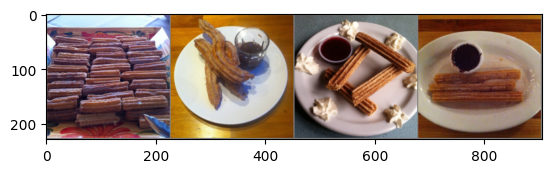

GroundTruth:  churros churros churros churros


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net =   ImprovedNet()
net.load_state_dict(torch.load(PATH))

<ipython-input-55-0f2884af96d9>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [ ]:
outputs = net(images)


In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  hot_and_sour_soup hot_and_sour_soup hot_and_sour_soup hot_and_sour_soup


In [ ]:
'''The results seem pretty good.

Let us look at how the network performs on the whole dataset.'''
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 1000 test images: {100 * correct // total} %')

Accuracy of the network on the 1000 test images: 14 %


In [ ]:
'''That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

 what are the classes that performed well, and the classes that did not perform well:

'''
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] != 0:  # Check if total_pred[classname] is not 0
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    else:
        print(f'Accuracy for class: {classname:5s} is 0.0 % (No predictions)')

Accuracy for class: apple_pie is 0.0 % (No predictions)
Accuracy for class: baby_back_ribs is 0.0 % (No predictions)
Accuracy for class: baklava is 0.0 % (No predictions)
Accuracy for class: beef_carpaccio is 0.0 % (No predictions)
Accuracy for class: beef_tartare is 0.0 %
Accuracy for class: beet_salad is 0.0 % (No predictions)
Accuracy for class: beignets is 0.0 % (No predictions)
Accuracy for class: bibimbap is 0.0 % (No predictions)
Accuracy for class: bread_pudding is 0.0 % (No predictions)
Accuracy for class: breakfast_burrito is 0.0 % (No predictions)
Accuracy for class: bruschetta is 0.0 % (No predictions)
Accuracy for class: caesar_salad is 0.0 % (No predictions)
Accuracy for class: cannoli is 0.0 % (No predictions)
Accuracy for class: caprese_salad is 0.0 % (No predictions)
Accuracy for class: carrot_cake is 0.0 % (No predictions)
Accuracy for class: ceviche is 0.0 % (No predictions)
Accuracy for class: cheese_plate is 0.0 % (No predictions)
Accuracy for class: cheesecake is 